# Future Work: General notes + Transpeciation/optimizers vs mathematical benchmarks

TODO: compare:

1. 9x "off-the-shelf" optimizers: 6x Global optimizers + 3x Local optimizers
2. 3x variants per Optimizer (slow, default, fast) or (exporation, default, expoitation)
3. 5x Mathematical benchmarks.
4. 100x Simulations per configuration.
5. 1000 fitness evaluation steps max (or STOP if converged early)
6. Traspeciation:
    a. 6 islands x {slow, default, fast}: 3 configurations
    b. 18 islands (all islands of (a))
    c. 2D CA grid of 5x5
    d. Local search of 100 fitness evaluations at the end.

Notes:

    - Goodness of Fit (GoF) % metric should be useful for: math benchmark performance aggregation %.
    - Multi-objective optimization:
        - Time-series CV MSE Mean of 1-7 next days ahead forecasting mean.
        - Fitness: Rank-weighted nD pareto of:
            1. MSE.            
            2. SMAPE%.
            3. MASE%.     
            4. IoA%.
    - Add gene: 1-7 lag (days before) input data.
    - Google TPUs for scaling up forecasting:
        - Next-day -> next-hours(1h to 24h x 7d):
            - 5 years of daily-timesteps (5y x 365 days): 1,825 to hourly-timesteps: 43,800 (24h x 5y x 365 days).
        - Atmospheric variables (x52) PER STATION.
    - 1D convolution.
    - Tree/root/graph-like DNN models (with merge/concat connections).
    - Extra genes:
        - Optimization function selection.
        - Initial learning rate.
        - Optimizer (level-up) genes and not only phenotype related (level-down):
            - Exploration/exploitation trade-off general parameter gene.
    - Candidate selection:
        - Tournament.
        - Replacement of individuals:
            - Age (and not only on peformance).
    - Hyper parameters:
        - Cyclical learning rate.
    


## IoA vs MSE vs MAPE

In [1]:
from __future__ import print_function
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot
# Make plots inline
%matplotlib inline

def smape(a, b):
    """
    Calculates sMAPE
    :param a: actual values
    :param b: predicted values
    :return: sMAPE
    """
    a = np.reshape(a, (-1,))
    b = np.reshape(b, (-1,))
    return 100.0 * np.mean(2.0 * np.abs(a - b) / (np.abs(a) + np.abs(b))).item()
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)    
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 # In %
def index_of_agreement(validation, prediction):
    return 1 - (np.sum((validation - prediction) ** 2)) / (np.sum((np.abs(prediction - 
      np.mean(validation)) + np.abs(validation - np.mean(validation))) ** 2))

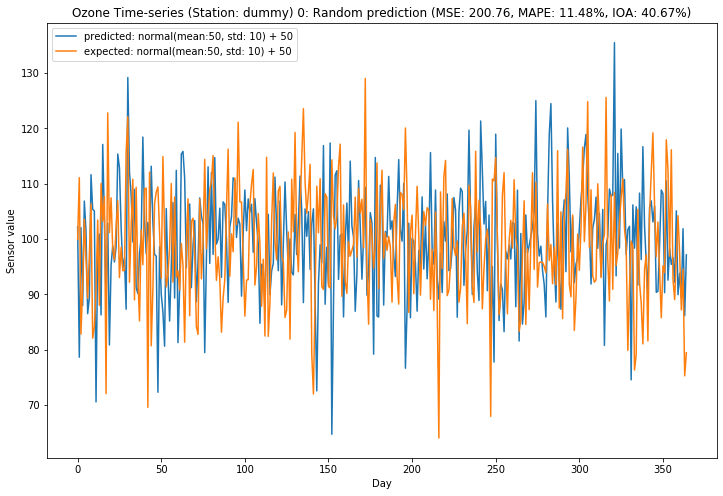

In [2]:
import numpy as np
y_expected = np.random.normal(50, 10, 365) + 50
y_predicted= np.random.normal(50, 10, 365) + 50
MSE = mean_squared_error(y_expected, y_predicted)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_expected, y_predicted)
MAPE = mean_absolute_percentage_error(y_expected, y_predicted)
SMAPE = smape(y_expected, y_predicted)
R2_score = r2_score(y_expected, y_predicted)
IOA = index_of_agreement(y_expected, y_predicted)
station = "dummy"
year = 0
lag = 1
fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=True, sharey=True)
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('Ozone Time-series (Station: {}) {}: Random prediction (MSE: {}, MAPE: {}%, IOA: {}%)'.format(station, year, np.round(MSE,2), np.round(MAPE,2), np.round(IOA * 100,2)))
pyplot.plot(y_predicted)
pyplot.plot(y_expected)
ax.legend(['predicted: normal(mean:50, std: 10) + 50','expected: normal(mean:50, std: 10) + 50'])
fig.savefig("sameNormal.png")

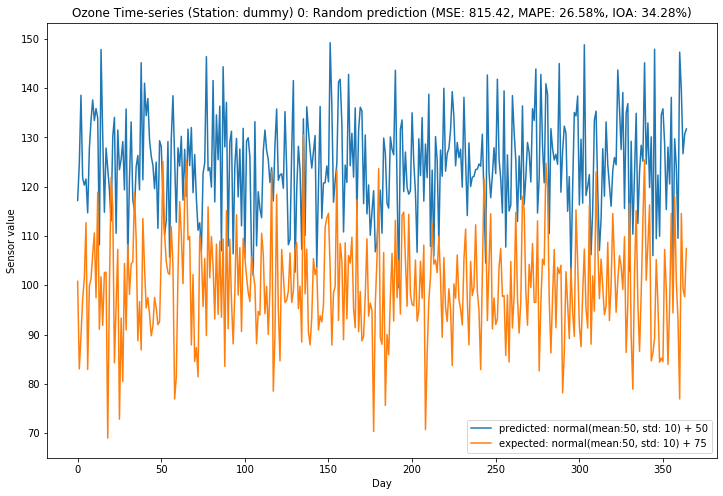

In [3]:
import numpy as np
y_expected = np.random.normal(50, 10, 365) + 50
y_predicted= np.random.normal(50, 10, 365) + 75
MSE = mean_squared_error(y_expected, y_predicted)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_expected, y_predicted)
MAPE = mean_absolute_percentage_error(y_expected, y_predicted)
SMAPE = smape(y_expected, y_predicted)
R2_score = r2_score(y_expected, y_predicted)
IOA = index_of_agreement(y_expected, y_predicted)
station = "dummy"
year = 0
lag = 1
fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=True, sharey=True)
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('Ozone Time-series (Station: {}) {}: Random prediction (MSE: {}, MAPE: {}%, IOA: {}%)'.format(station, year, np.round(MSE,2), np.round(MAPE,2), np.round(IOA * 100,2)))
pyplot.plot(y_predicted)
pyplot.plot(y_expected)
ax.legend(['predicted: normal(mean:50, std: 10) + 50','expected: normal(mean:50, std: 10) + 75'])
fig.savefig("upNormal.png")

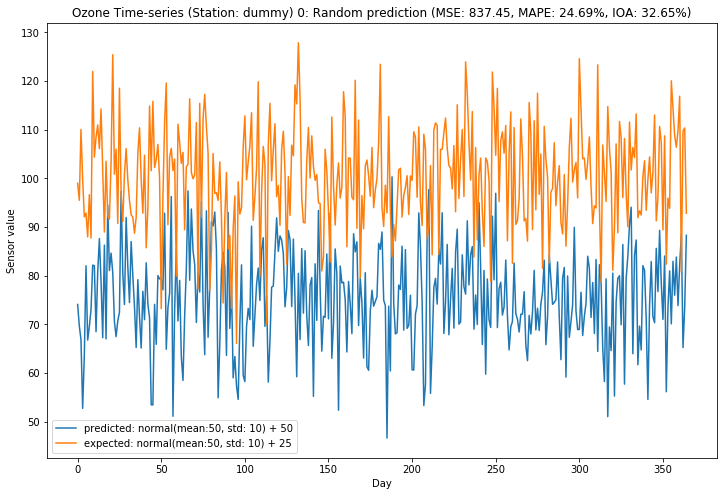

In [4]:
import numpy as np
y_expected = np.random.normal(50, 10, 365) + 50
y_predicted= np.random.normal(50, 10, 365) + 25
MSE = mean_squared_error(y_expected, y_predicted)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_expected, y_predicted)
MAPE = mean_absolute_percentage_error(y_expected, y_predicted)
SMAPE = smape(y_expected, y_predicted)
R2_score = r2_score(y_expected, y_predicted)
IOA = index_of_agreement(y_expected, y_predicted)
station = "dummy"
year = 0
lag = 1
fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=True, sharey=True)
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('Ozone Time-series (Station: {}) {}: Random prediction (MSE: {}, MAPE: {}%, IOA: {}%)'.format(station, year, np.round(MSE,2), np.round(MAPE,2), np.round(IOA * 100,2)))
pyplot.plot(y_predicted)
pyplot.plot(y_expected)
ax.legend(['predicted: normal(mean:50, std: 10) + 50','expected: normal(mean:50, std: 10) + 25'])
fig.savefig("downNormal.png")

In [5]:
MSEs = []
MAPEs = []
IOAs = []
for i in range (0, 500):
    y_expected = np.random.normal(50, 10, 365) + 50
    y_predicted= np.random.normal(50, 10, 365) + 50
    MSE = mean_squared_error(y_expected, y_predicted)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_expected, y_predicted)
    MAPE = mean_absolute_percentage_error(y_expected, y_predicted)
    SMAPE = smape(y_expected, y_predicted)
    R2_score = r2_score(y_expected, y_predicted)
    IOA = index_of_agreement(y_expected, y_predicted)
    MSEs.append(MSE)
    IOAs.append(IOA)
    MAPEs.append(MAPE)    
    if np.min(y_predicted) < 0:
        print("ALERT")
print("MSEs: {} +/- {}".format(np.mean(MSEs), np.std(MSEs)))
print("MAPEs: {} +/- {}".format(np.mean(MAPEs), np.std(MAPEs)))
print("IOAs: {} +/- {}".format(np.mean(IOAs), np.std(IOAs)))

MSEs: 199.61985105410264 +/- 14.584866543224718
MAPEs: 11.456158157125843 +/- 0.4652839127154567
IOAs: 0.3880425185534421 +/- 0.034114216159685705


In [6]:
MSEs = []
MAPEs = []
IOAs = []
for i in range (0, 500):
    y_expected = np.random.normal(50, 10, 365) + 70
    y_predicted= y_expected + np.random.normal(0, 18, 365)
    MSE = mean_squared_error(y_expected, y_predicted)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_expected, y_predicted)
    MAPE = mean_absolute_percentage_error(y_expected, y_predicted)
    SMAPE = smape(y_expected, y_predicted)
    R2_score = r2_score(y_expected, y_predicted)
    IOA = index_of_agreement(y_expected, y_predicted)
    MSEs.append(MSE)
    IOAs.append(IOA)
    MAPEs.append(MAPE)   
    if np.min(y_predicted) < 0:
        print("ALERT")
print("MSEs: {:.2f} +/- {:.2f}".format(np.mean(MSEs), np.std(MSEs)))
print("MAPEs: {:.2f} +/- {:.2f}".format(np.mean(MAPEs), np.std(MAPEs)))
print("IOAs: {:.2f} +/- {:.2f}".format(np.mean(IOAs), np.std(IOAs)))

MSEs: 323.94 +/- 25.02
MAPEs: 12.06 +/- 0.51
IOAs: 0.60 +/- 0.03


In [7]:
MSEs = []
MAPEs = []
IOAs = []
for i in range (0, 500):
    y_expected = np.random.normal(50, 10, 365) + 70
    y_predicted= y_expected + np.random.normal(0, 18, 365) + 65
    MSE = mean_squared_error(y_expected, y_predicted)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_expected, y_predicted)
    MAPE = mean_absolute_percentage_error(y_expected, y_predicted)
    SMAPE = smape(y_expected, y_predicted)
    R2_score = r2_score(y_expected, y_predicted)
    IOA = index_of_agreement(y_expected, y_predicted)
    MSEs.append(MSE)
    IOAs.append(IOA)
    MAPEs.append(MAPE)   
    if np.min(y_predicted) < 0:
        print("ALERT")
print("MSEs: {:.2f} +/- {:.2f}".format(np.mean(MSEs), np.std(MSEs)))
print("MAPEs: {:.2f} +/- {:.2f}".format(np.mean(MAPEs), np.std(MAPEs)))
print("IOAs: {:.2f} +/- {:.2f}".format(np.mean(IOAs), np.std(IOAs)))

MSEs: 4540.66 +/- 125.57
MAPEs: 54.51 +/- 0.83
IOAs: 0.21 +/- 0.01


# Grading sampling

In [8]:
import numpy as np
from sklearn.preprocessing import normalize
def my_normalize(input_array):
    np_process = np.array(input_array)

    sum1 = np_process.sum()
    np_process2 = np_process / sum1
    return np_process2

In [20]:
# process = [0, 0, 0, 1, 8, 8]
# content = [1, 1, 3, 5, 5, 3]
# form = [1, 2, 2, 3, 2, 2]
# defence = [0, 1, 5, 6, 6, 5]

process = [0, 0, 0, 1, 8, 8]
content = [1, 1, 3, 5, 5, 3]
form = [1, 2, 2, 3, 2, 2]
defence = [0, 1, 5, 6, 6, 5]

# 0. Normalize all probabilities to sum 100%
# 1. Random sample 100x
# 2. Manual range 1x
# - 5 points to 20 points scaling ranging
process_scaled = my_normalize(process)
content_scaled = my_normalize(content)
form_scaled = my_normalize(form)
defence_scaled = my_normalize(defence)
mins = [6, 10, 12, 14, 16, 18]
maxs = [9.9, 11.9, 13.9, 15.9, 17.9, 20]
sampled_mins = []
sampled_maxs = []
random_p_choices = []
iterations = 100
for iteration in range(iterations):
    for scaled_array in [process_scaled, content_scaled, form_scaled, defence_scaled]:
        random_p_choices.append(np.random.choice(np.arange(1, 7), p=scaled_array))
    picked_mins = []
    picked_maxs = []
    i = 0
    for choice in random_p_choices:    
        picked_mins.append(mins[choice - 1])
        picked_maxs.append(maxs[choice - 1])
        i += 1
    sampled_mins.append(np.mean(picked_mins))
    sampled_maxs.append(np.mean(picked_maxs))
min_final = np.mean(sampled_mins)
max_final = np.mean(sampled_maxs)
mean_final = (min_final + max_final) / 2.0
print("Min: ", np.round(min_final))
print("Max: ", np.round(max_final))
print("Avg: ", np.round(mean_final))

print("\nMin: ", np.round(min_final)/2.0)
print("Max: ", np.round(max_final)/2.0)
print("Avg: ", np.round(mean_final)/2.0)

Min:  15.0
Max:  17.0
Avg:  16.0

Min:  7.5
Max:  8.5
Avg:  8.0


# Test rescaling a "bad/repeating" random sample

In [44]:
import numpy as np
k = np.random.rand(40) + 500

In [45]:
import pandas as pd
df1 = pd.DataFrame(k)

In [46]:
df1.head()

,0
0,500.122476
1,500.745294
2,500.701370
3,500.886234
4,500.529185


In [54]:
print(df1.mean(), df1.std())

0    500.496331
dtype: float64 0    0.307335
dtype: float64


(480, 501)

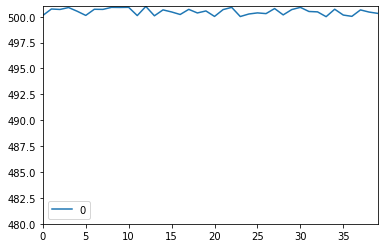

In [47]:
ax = df1.plot()
ax.set_ylim(480, 501)

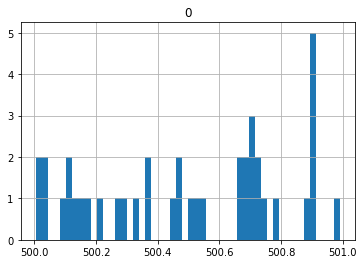

In [65]:
axhist = df1.hist(bins=50)

In [48]:
k_standardized = (k - k.mean()) / k.std()

(-5, 5)

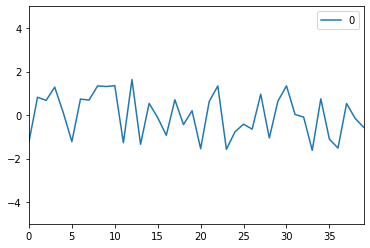

In [49]:
df2 = pd.DataFrame(k_standardized)
ax = df2.plot()
ax.set_ylim(-5, 5)

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0, 500))

In [51]:
X = k_standardized
k_max = 500
k_min = 0
scale = (k_max - k_min) / (X.max(axis=0) - X.min(axis=0))
X_scaled = scale * X + k_min - X.min(axis=0) * scale





(-50, 520)

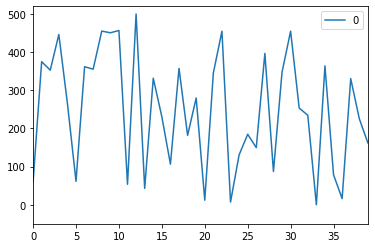

In [58]:
df3 = pd.DataFrame(X_scaled)
ax = df3.plot()
ax.set_ylim(-50, 520)

In [57]:
print(df3.mean(), df3.std())

0    248.995402
dtype: float64 0    155.558029
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B31BD3080>]],
      dtype=object)

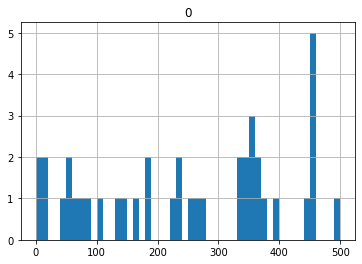

In [61]:
df3.hist(bins=50)